<div>
<img src="figures/svtLogo.png"/>
</div>  

<center><h1>Mathematical Optimization for Engineers</h1></center>
<center><h2>Lab 7 - Interior point method</h2></center>

Let's consider the following linear optimization problem:

\begin{align*}
		\min_{x_1,x_2} x_1 + x_2 \\
		\mbox{s.t. } x_1 \geq -1 \\
								 x_2 \geq -1 \\
\end{align*}

<u>Task 1</u>: Sketch the feasible region for this problem and contour lines of the objective. Where is the optimal solution?

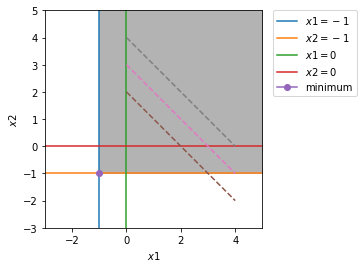

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plot the feasible region
d = np.linspace(-3,5,300)
x,y = np.meshgrid(d,d)
plt.imshow(((x>=-1) & (y>=-1)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(-3, 5, 500)
y = np.linspace(-3, 5, 500)

xl = np.linspace(0, 4, 500)

# Make plot
plt.plot(-1*np.ones_like(y), y, label=r'$x1=-1$')
plt.plot(x, -1*np.ones_like(x), label=r'$x2=-1$')
plt.plot(0*np.ones_like(y), y, label=r'$x1=0$')
plt.plot(x, 0*np.ones_like(x), label=r'$x2=0$')

plt.plot(-1, -1, '-o', label=r'minimum')
for i in range(2,5): 
    plt.plot(xl, i-xl, '--')
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')
plt.show()

<u>Task 2</u>: Set up the Lagrangian function and write down the KKT-conditions.

<details>
Now we will set up the Lagrange function, $L (x_1, x_2, \lambda_1, \lambda_2)$. 
<br>
<br>
Since, we have two constraints, we need two Lagrange multipliers $\lambda_1$ and $\lambda_2$.
<br>
$$L (x_1, x_2, \lambda_1, \lambda_2) = x_1 + x_2 - \lambda_1 (x_1 + 1) - \lambda_2 (x_2 + 1)$$
    
\begin{align}
\nabla_\mathbf x L  =  \left[\begin{array}{c} 1-\lambda_1 \\ 1-\lambda_2 \\ \end{array}\right] &= \left[\begin{array}{c} 0  \\ 0  \\ \end{array}\right] \\
x_1 + 1 & \geq  0  \\
x_2 + 1 & \geq  0 \\
\lambda_1, \lambda_2 & \geq  0 \\
\lambda_1 \left( x_1 + 1 \right) & =  0 \\
\lambda_2 \left( x_2 + 1 \right) & =  0 
\end{align}
    
Note that even though our original problem is an LP, the system of KKT-equations is non-linear. This is because of the bi-linear terms from complementarity slackness.

</details>

<u>Task 3</u>: Transform the inequalities of the resulting nonlinear equation system into equalities by introducing slack variables.

<details>
By introducing two slack variables $s_1 \geq 0$ and $s_2 \geq 0$, the inequalities, $x_1 \geq -1$ and $x_2 \geq -1$, can be transformed into equalities. 
<br>
Thus, we define $s_1 = x_1 + 1$ and $s_2 = x_2 + 1$. Then, the KKT-conditions can be rewritten as:
    
\begin{align}
\nabla_\mathbf x L  =  \left[\begin{array}{c} 1-\lambda_1 \\ 1-\lambda_2 \\ \end{array}\right] &= \left[\begin{array}{c} 0  \\ 0  \\ \end{array}\right] \\
x_1 + 1 - s_1 & =  0 \\
x_2 + 1 - s_2 & =  0 \\
\qquad s_1, s_2 & \geq  0 \\
\lambda_1, \lambda_2 & \geq  0 \\
\lambda_1 s_1 & =  0 \\
\lambda_2 s_2 & =  0 
\end{align}   
    
To be more precise we have changed the problem: 
   

\begin{align}
\nabla_\mathbf x L  =  \left[\begin{array}{c} 1-\lambda_3 \\ 1-\lambda_4 \\ \end{array}\right] &= \left[\begin{array}{c} 0  \\ 0  \\ \end{array}\right] \\
\nabla_\mathbf s L =  \left[\begin{array}{c} \lambda_1-\lambda_3 \\ \lambda_2-\lambda_4 \\ \end{array}\right] &= \left[\begin{array}{c} 0  \\ 0  \\ \end{array}\right] \\
x_1 + 1 - s_1 & =  0 \\
x_2 + 1 - s_2 & =  0 \\
\qquad s_1, s_2 & \geq  0 \\
\lambda_1, \lambda_2 & \geq  0 \\
\lambda_1 s_1 & =  0 \\
\lambda_2 s_2 & =  0 
\end{align}
    
However, we omit the Lagarange multipliers $\lambda_3$ and $\lambda_4$ for the equality constraints, since the equation is trivial. 
    
</details>

The general idea of interior-point methods is to apply the Newton method (for root finding) to solve (approximated) KKT conditions.

<u>Task 4</u>: Change the complementarity constraints by adding a parameter $\tau$ on the right hand side.

<details>
When we apply Newton's method (for root finding) to the equations mentioned above, we see that convergence is very slow. The reason for this are the complementarity constraints. Thus, these equations are approximated by a positive parameter $\tau >0$.
\begin{align}
		\lambda_1 s_1 & =  \tau \label{complementary1b}\\
		\lambda_2 s_2 & =  \tau \label{complementary2b}
\end{align}
<br>    
The feasible set of the complementarity constraints now looks like:
<img src="figures/HU83.png" width="400">
</details>

<u>Task 5</u>: Solve the nonlinear equation system analytically.

<details>
From stationarity, it follows that $\lambda_1=1$ and $\lambda_2=1$. 
<br>
From the modified complementarity conditions , we know that $s_1= \frac{\tau}{\lambda_1}$ and $s_1 = \frac{\tau}{\lambda_2}$. 
<br>    
From the equality constraints, we can calculate $x_1$ and $x_2$ as $x_1 = \frac{\tau}{\lambda_1}-1$ and $x_2 = \frac{\tau}{\lambda_2}-1$.
</details>

<u>Task 6</u>: Sketch the central path in the domain of $x_1$ and $x_2$ for different values of $\tau$.

<details>
For $\tau \rightarrow 0$, the solution moves to the solution of the original problem.
<br> 
$x_1 = \frac{\tau}{\lambda_1}-1$ and $x_2 = \frac{\tau}{\lambda_2}-1$
<br>
$\lambda_1=1$ and $\lambda_2=1$    
<img src="figures\HU84.png" width="400">
</details>

<u>Task 7</u>: Sketch the feasible set of the complementarity constraints for different values of $\tau$.

<details>
For $\tau \rightarrow 0$, the solution moves to the left boundary of the feasible set.
<img src="figures/HU85.png" width="400">    
</details>

<u>Task 8</u>: Write down the Newton step for solving the approximated KKT-conditions.

<details>
<br>
Typically, the system of equations is very complex or impossible to solve analytically. Thus, we want to solve it using Newton's method (for root finding).
<br>
<br>
One step of Newton's method can be written as:
$$\mathbf x^{k+1} = \mathbf x^k - \frac{f(\mathbf x^k)}{f'(\mathbf x^k)} $$
<br>
$$\implies \delta \mathbf x^k = - \frac{f(\mathbf x^k)}{f'(\mathbf x^k)} $$
<br>
$$\implies f'(\mathbf x^k) \, \delta \mathbf x^k = - f(\mathbf x^k)$$
    
where, we solve for $\delta \mathbf x^k$ to move to the next iterate.<br>
<br>
If $||\delta \mathbf x_k|| \lt \epsilon$ for a small $\epsilon$, i.e. two consecutive iterates are close enough, the Newton algorithm stops and returns $x_{k+1}$ as the root.
<br>
<br>
Now, we want to apply the Newton step to our system. The variables, which we want to determine, are $x_1, x_2, \lambda_1, \lambda_2, s_1$ and $s_2$. 
<br>
<br>
We define:
<br>
$\delta x_{1,k} = x_{1,k+1}-x_{1,k}$,
<br>    
$\delta x_{2,k} = x_{2,k+1}-x_{2,k}$,
<br>    
$\delta \lambda_{1,k} = \lambda_{1,k+1}-\lambda_{1,k}$,
<br>    
$\delta \lambda_{2,k} = \lambda_{2,k+1}-\lambda_{2,k}$,
<br>    
$\delta s_{1,k} = s_{1,k+1}-s_{1,k}$ and
<br>    
$\delta s_{2,k} = s_{2,k+1}-s_{2,k}$. 
<br>
<br>
Then we can write the k-th iteration as:
<br>
$$\left[\begin{array}{cccccc}
    0 & 0 &     0     &     0     & -1  &  0  \\
    0 & 0 &     0     &     0     &  0  & -1  \\
    1 & 0 &    -1     &     0     &  0  &  0  \\
    0 & 1 &     0     &     0     & -1  &  0  \\
    0 & 0 & \lambda_1 &     0     & s_1 &  0  \\
    0 & 0 &     0     & \lambda_2 &  0  & s_2
\end{array}\right]
\cdot \left[\begin{array}{c}
\delta x_{1,k}\\
\delta x_{2,k}\\
\delta s_{1,k}\\
\delta s_{2,k}\\
\delta \lambda_{1,k}\\
\delta \lambda_{2,k}\\
\end{array}\right] =
- \left[\begin{array}{c}
1-\lambda_1\\
1-\lambda_2\\
x_1 + 1 - s_1\\
x_2 + 1 - s_2\\
\lambda_1 s_1\\
\lambda_2 s_2\\
\end{array}\right]
+ \left[\begin{array}{c}
0\\
0\\
0\\
0\\
\tau\\
\tau\\
\end{array}\right]$$
<br>
Note, that this is always a system of linear equations, even though the original function $f$ is nonlinear.    
</details>

We will solve this system using Python below.

In [2]:
import autograd
import autograd.numpy as np

# RHS of KKT system
def F(Z, tau):
    x1 = Z[0]
    x2 = Z[1]
    s1 = Z[2]
    s2 = Z[3]
    l1 = Z[4]
    l2 = Z[5]
    F = np.array([1-l1,
         1-l2,
         x1+1-s1,
         x2+1-s2,
         l1*s1 - tau,
         l2*s2 - tau])
    return F

Typically, it is very difficult to find a strictly feasible initial point. Here, we are able to pick a random point because the problem is very small.

In [3]:
 def solve(tau):

    # initial point for original problem
    Z = np.ones(6)
    
    # initial guess for Newton's method
    deltaZ = np.ones(6)
    
    # convergence tolerance
    tol = 1e-5
    
    # f_prime
    jac = autograd.jacobian(F, 0)
    
    it=0
    # KKT conditions are a set of nonlinear equations we need to solve
    # F(x, slack, lambda) = 0 (for exact KKT)
    # Apply Newton's method to iterate to the solution. 
    # F(Z0) + Jacobian(Z0) * deltaZ = 0
    while np.linalg.norm(deltaZ) > tol:
        it=it+1
        
        f_prime = jac(Z,tau)
        f = F(Z,tau)

        # solve linear equation system
        deltaZ = np.linalg.solve(f_prime, -f)

        Z = Z + deltaZ
        
    return Z, it

In [4]:
# loop for different values of tau
tau = [1.0, 0.5, 0.25, 0.125, 1e-2, 1e-3, 1e-5]
print("{:<10} {:<20} {:^10}".format('tau','minimum','iter'))
for itau in tau:
    Zopt, it = solve(itau)
    print ("{:<10} [{:^8.4f}, {:^8.4f}] {:<4} {:<20d}".format(itau,Zopt[0],Zopt[1],' ',it))

tau        minimum                 iter   
1.0        [ 0.0000 ,  0.0000 ]      2                   
0.5        [-0.5000 , -0.5000 ]      2                   
0.25       [-0.7500 , -0.7500 ]      2                   
0.125      [-0.8750 , -0.8750 ]      2                   
0.01       [-0.9900 , -0.9900 ]      2                   
0.001      [-0.9990 , -0.9990 ]      2                   
1e-05      [-1.0000 , -1.0000 ]      2                   
